# Пример применения $KFDA$ для распознавания лиц
 И его сравнение с методом $KPCA$.

In [1]:
#Необходимые модули:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier  
import scipy.io as sio
import nbimporter
from sklearn.preprocessing import StandardScaler
import matplotlib.lines as mLines
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from matplotlib import rc
import mpl_toolkits.mplot3d as plt3d
from sklearn.metrics import accuracy_score
from skimage import io, color
from sklearn.decomposition import PCA, KernelPCA
from sklearn import cross_validation, metrics
from sklearn.cross_validation import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Функция для оценки точности классификатора
def accuracy( X, y, cl, k=10, t = 5):
        av_accuracy_score = 0
        for i in range (0,t): 
            skf = StratifiedKFold(n_splits=k, shuffle = True)
            for train_index, test_index in skf.split(X, y):
                Xtr, Xtst, ytr, ytst = X[train_index], X[test_index], y[train_index], y[test_index]
                cl.fit(Xtr, ytr)
                ypred = cl.predict(Xtst)
                av_accuracy_score = av_accuracy_score + accuracy_score(ypred, ytst)
        return (av_accuracy_score/(k*t))
    

C:\Users\ninak\Anaconda333\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%run KFDA_classificator.ipynb #Ипортируем классификатор KFDACl

## Preprocessing
Обробатываем исходные изображения из датасета FACES, составляя матрицу, каждая $i$-ая строка которой соответсвует разложению $i$-ой картинки на пиксели.

Пример данных (разрешение каждой картинки (50 х 50)):


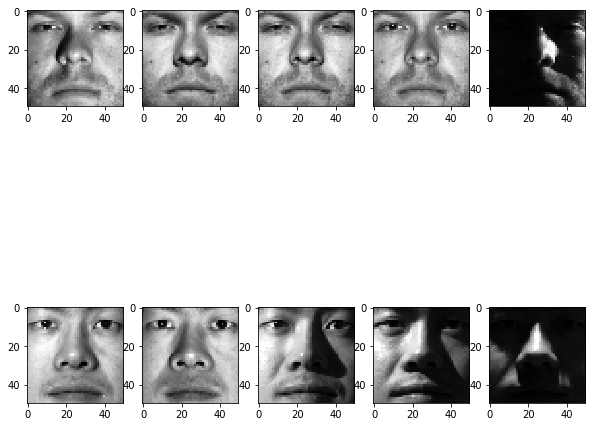

Всего данных изображений: 640
Кол-во различных людей(классов) среди них: 10


In [3]:
%matplotlib inline
numImg = 64
numSbj = 11
train_labels, train_data,test_labels, test_data, = [], [], [], []
for line in open('./faces/train.txt'):
    im = misc.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)
plt.rcParams["figure.figsize"]=[10,10]
plt.rcParams["figure.figsize"]=[10,10]

for i in range (1,6):
    plt.subplot(2,5,i)
    plt.imshow(train_data[i, :].reshape(50,50),  cmap = cm.Greys_r)
print("Пример данных (разрешение каждой картинки (50 х 50)):")
for i in range (1,6):
    plt.subplot(2,5,5+i)
    plt.imshow(train_data[64+i, :].reshape(50,50),  cmap = cm.Greys_r)
Xtr = train_data
ytr = train_labels
plt.savefig("faces00.pdf",  bbox_inches = 'tight')

plt.show()
for line in open('./faces/test.txt'):
    im = misc.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)
Xtst = test_data
ytst = test_labels
X = np.concatenate((Xtr, Xtst), axis = 0)
y = np.concatenate((ytr, ytst))
print("Всего данных изображений:", X.shape[0])
print("Кол-во различных людей(классов) среди них:", len(np.unique(y)))

Попрбоуем классфицировать данные методом $KNN$:

## Eigenfaces
С помошью алгоритма $PCA$ найдем главные компоненты данных (ограничемся четырьмя), преобразовав полученные вектора в изображжения, получим Eigenfaces (собственные лица).  После проекции в подпространство их данных векторов, классифицируем данные методом $KNN$. С помошью функции $accuracy$ оценим точность классификатора.

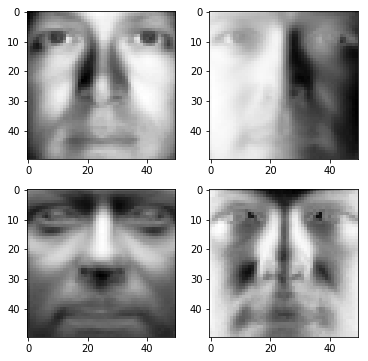

In [4]:
plt.rcParams["figure.figsize"]=[6,6]
plt.figure()
pca = PCA(n_components=4)
pca.fit(X)
plt.title("Eigenfaces:")
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    ax.imshow(pca.components_[i].reshape([50, 50]), cmap = cm.Greys_r)
plt.savefig("eigenvectors.pdf")
plt.show()


In [5]:
# Функция для визуализации проекции данных на найденное подпространство:
def viz_projection(drX,y, i = 1,two = True):
    #cols = ['#{:06x}'.format(random.randint(0, 0xffffff)) for i in range (numSbj)]
    cols = ['b', 'r', 'black', 'yellow', 'purple',   'pink', 'g', 'grey', 'fuchsia', 'orange', 'saddlebrown']
    pltCol = [cols[int(k)] for k in y]
    plt.rcParams["figure.figsize"]=[30,10]
    if two:
        
        plt.subplot(1,3,1)
        plt.title("2D Projection of 1st&2nd classes", fontsize =40)
        plt.xlabel('First vector',  fontsize =30)
        plt.ylabel('Second vector', fontsize =30)
        plt.scatter(drX[70:150, 0], drX[70:150, 1], color=pltCol)
    plt.subplot(1,3,2)
    plt.xlabel('First vector',  fontsize =30)
    plt.title("2D  Projection",  fontsize =40)
    
    plt.ylabel('Second vector', fontsize =30)
    plt.scatter(drX[:, 0], drX[:, 1], color=pltCol)
    ax = plt.subplot(133,projection='3d')
    ax.set_title("3D projection", fontsize =40)
    ax.scatter(drX[:, 0], drX[:, 1], drX[:, 2],s =100, c = pltCol)
    ax.set_xlabel('First vector', fontsize =30)
    ax.set_ylabel('Second vector', fontsize =30)
    ax.set_zlabel ('Third vector', fontsize =30)

Проекция PCA:


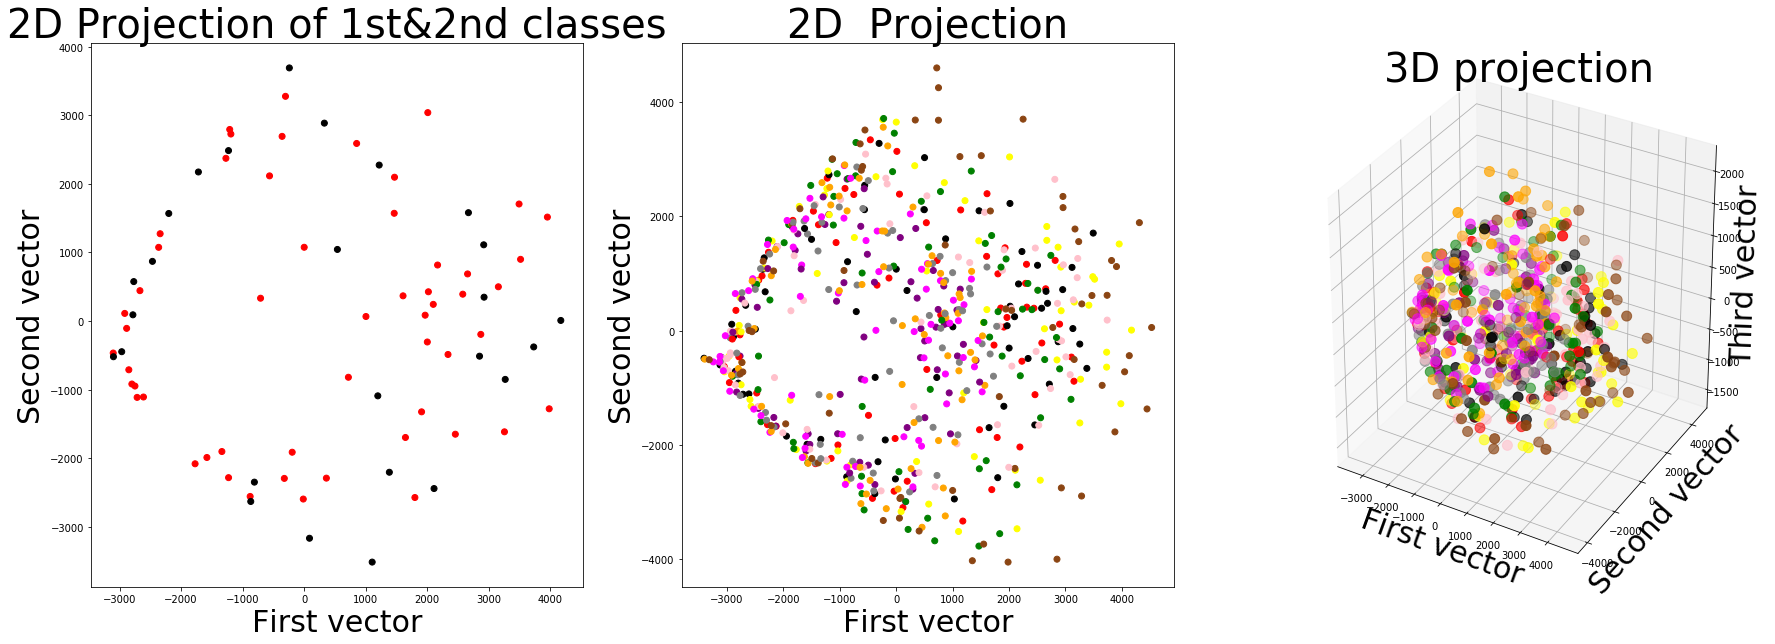

In [6]:
print ("Проекция PCA:")
drX = pca.transform(X)
viz_projection(drX,y)
plt.savefig("FacePCA.pdf")


## Теперь применим $KPCA$:

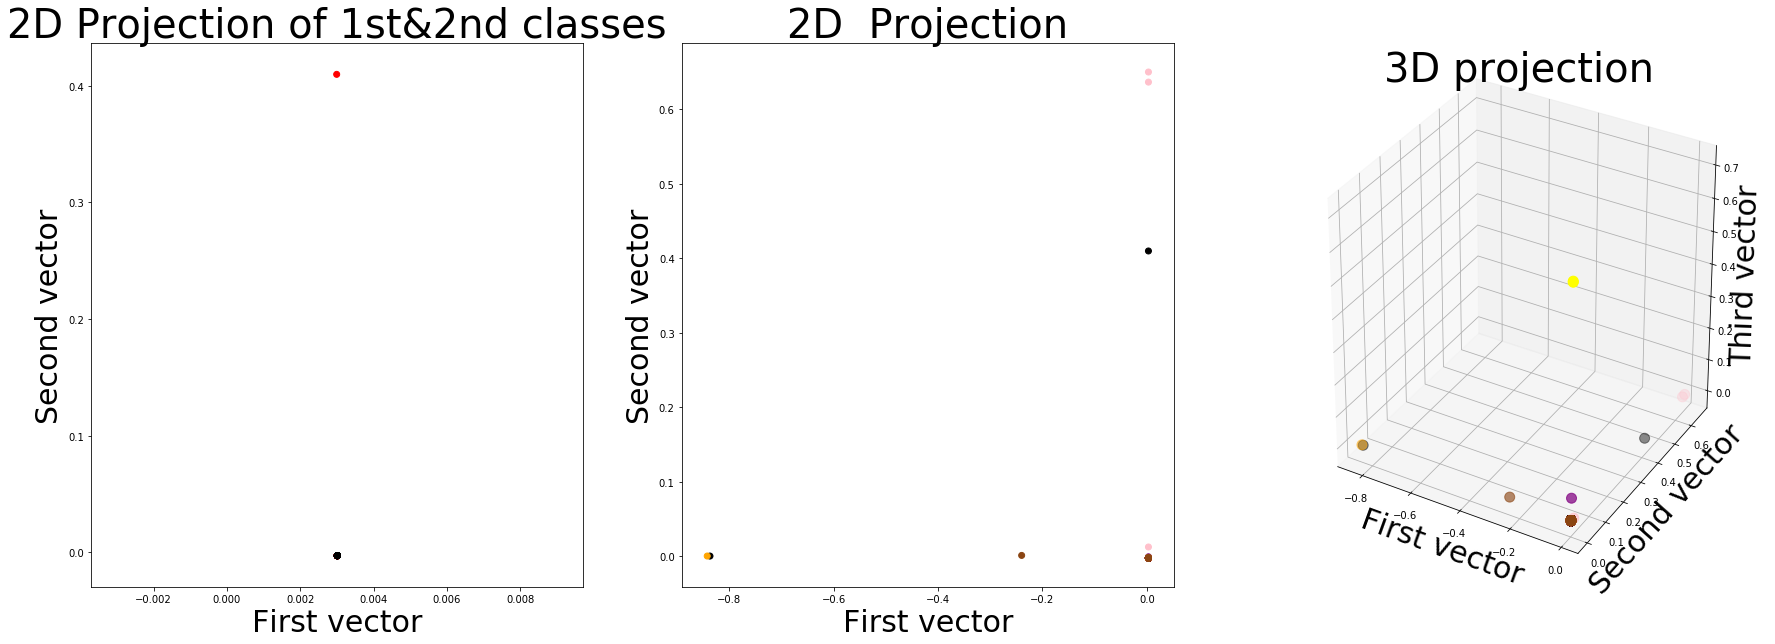

In [7]:
KPCA = KernelPCA(kernel = 'rbf', n_components = 3, gamma = 1/6000)
KPCA.fit(X,y)
drX = KPCA.transform(X)
viz_projection(drX,y)
plt.savefig("FaceKPCA1.pdf")


## Fisherfaces
Уменьшим размерность подпространства методом $LDA$. Вектора, на которые проецируются данные, после преобразования в изображения, называются fisherfaces.

Fisherfaces:


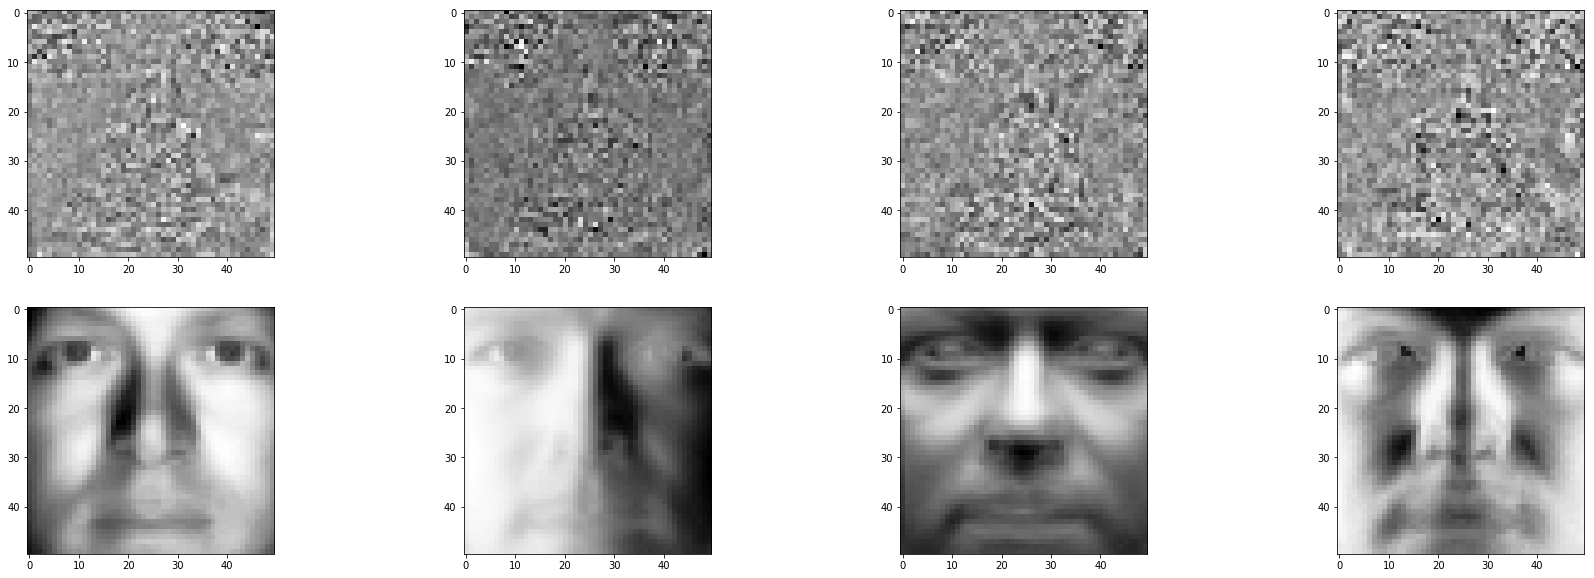

<Figure size 2160x720 with 0 Axes>

Accuracy: 0.9860476190476191


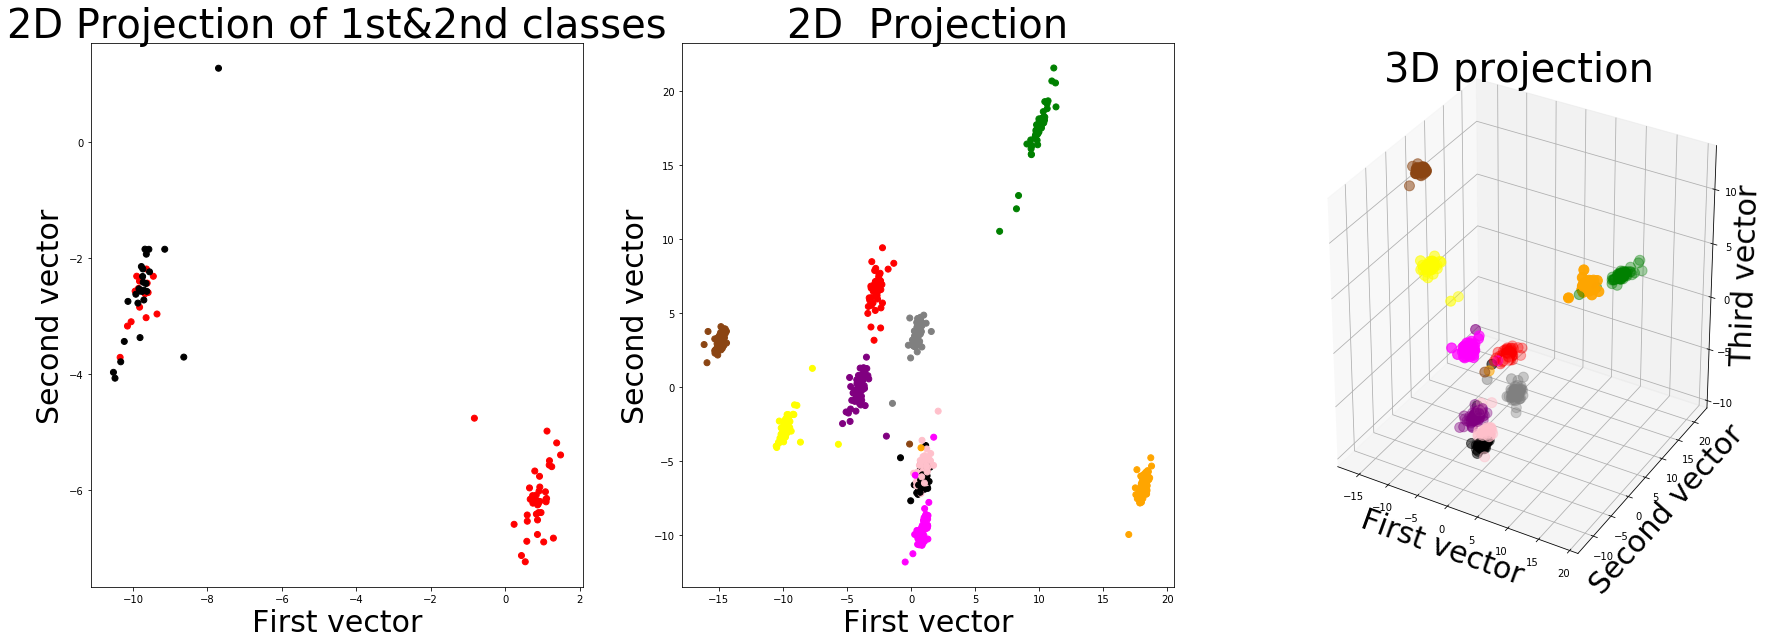

In [8]:
# %%Compute Fisherfaces
lda = LinearDiscriminantAnalysis(solver = 'svd')
#plt.rcParams["figure.figsize"]=[6,6]
lda.fit(X, y)
ldatX = lda.transform(X)
#Plot fisherfaces
plt.figure()
print("Fisherfaces:")
for i in range(4):
    ax = plt.subplot(2, 4, i + 1)
    C1 = lda.scalings_[:, i]
    C1.shape = [50, 50]
    ax.imshow(C1,  cmap = cm.Greys_r)
for i in range(4):
    ax = plt.subplot(2, 4, i + 5)
    ax.imshow(pca.components_[i].reshape([50, 50]), cmap = cm.Greys_r)
plt.savefig("eigenvectors.pdf")
plt.show()

plt.savefig("fisherfaces.pdf")
plt.show()

viz_projection(lda.transform(X),y)
plt.savefig("facesFDA1.pdf")
KNN = KNeighborsClassifier(n_neighbors = 5)  
print("Accuracy:", accuracy(lda.transform(X), y, KNN))


### Теперь для более лучшей проекции, применим $KFDA$:

1.0
Accuracy: 0.9943333333333336


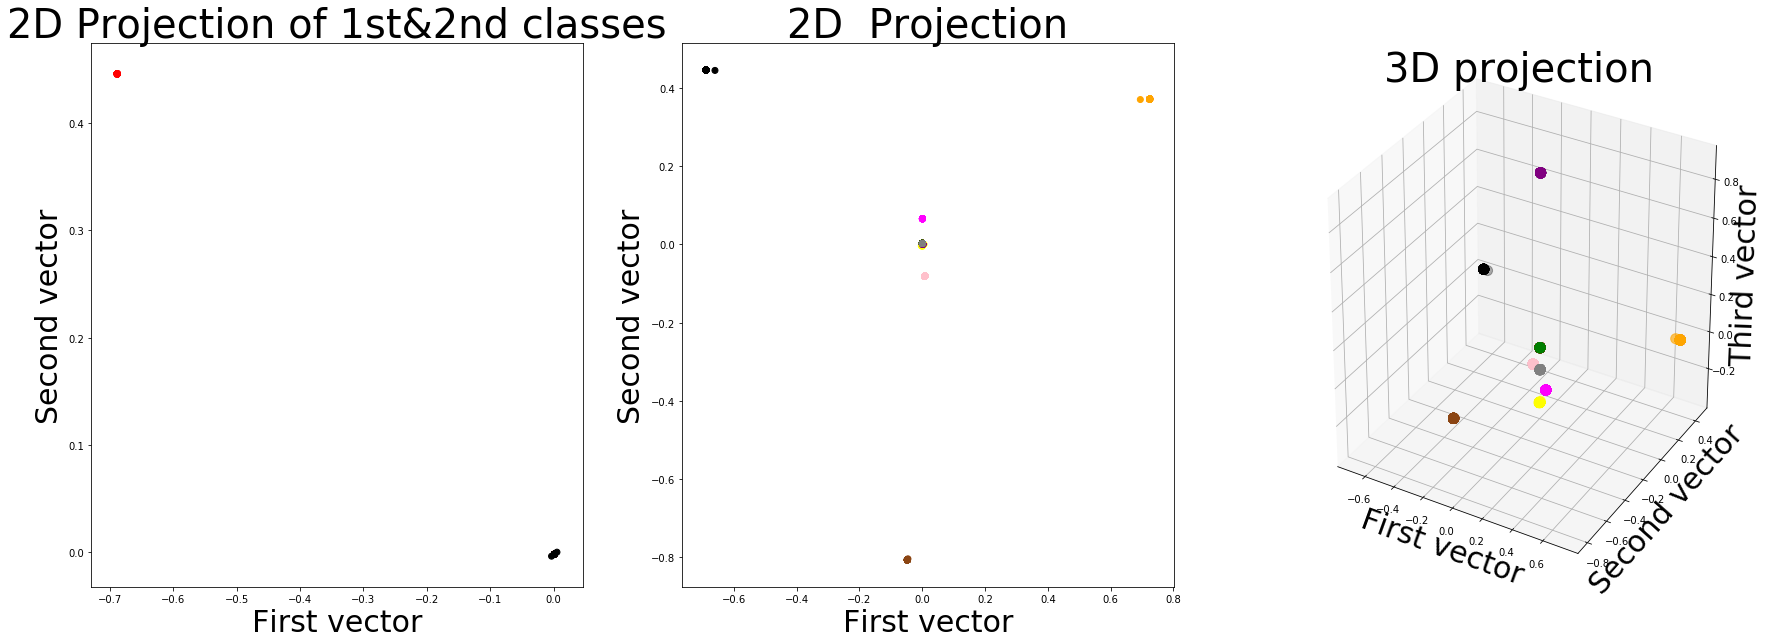

In [9]:
# %%Compute Fisherfaces
cl = KFDACl( Alg = 'KNN', gamma = 120)
cl.fit(X,y)
cl.transform(X,3)
viz_projection(cl.transform(X,3), y)
plt.savefig("facesKFDA.pdf")
X_red = cl.transform(X,3)
KNN = KNeighborsClassifier(n_neighbors = 5)  
print("Accuracy:", accuracy(X_red, y, KNN))


### Если кол-во измерений признаков сравнимо с кол-ом образцов, сначала имеет смысл использовать $PCA$, а затем $FDA:$

Accuracy: 1.0


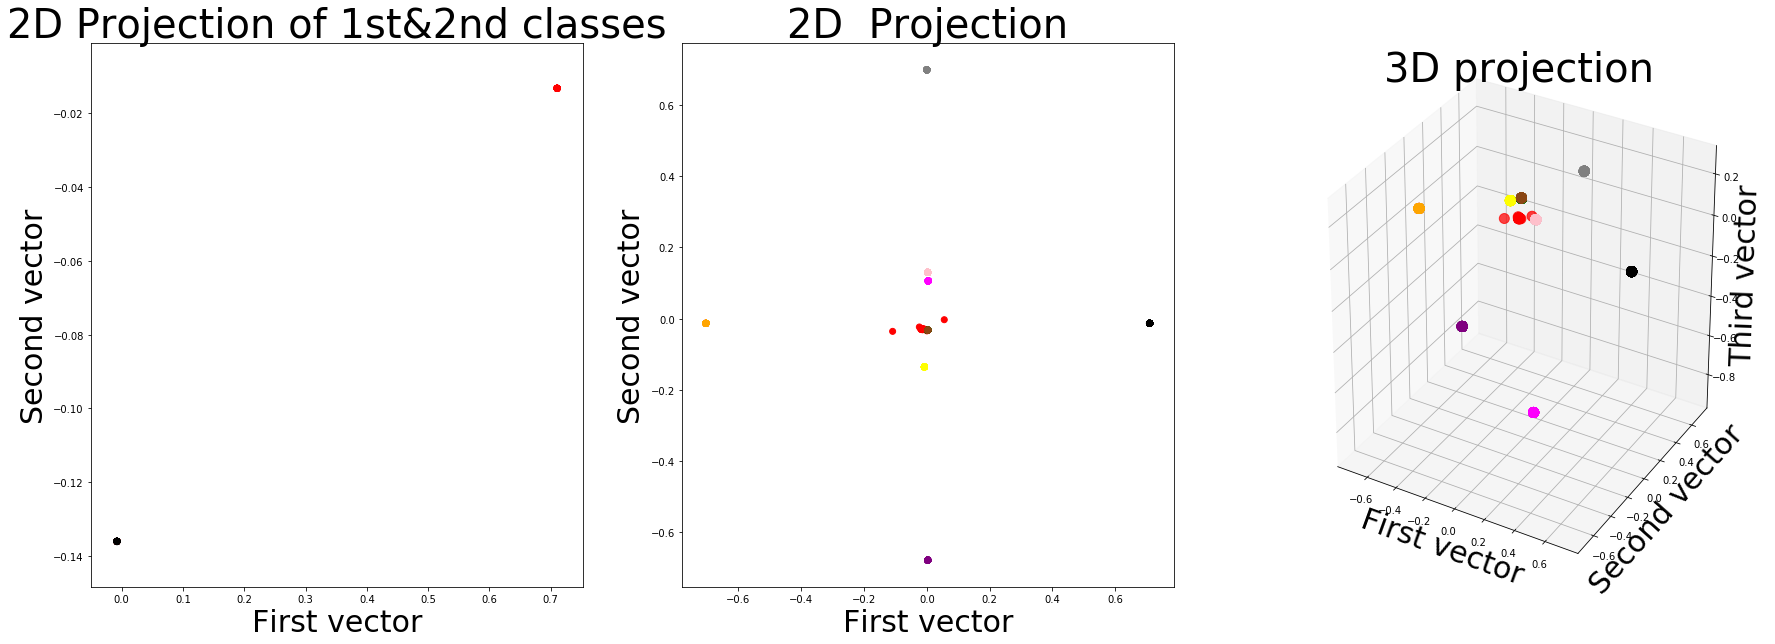

In [10]:
# %%Compute Fisherfaces
lda = KFDACl(gamma = 20)
viz_projection(lda.fit(pca.transform(X),y).transform(pca.transform(X),3), y)
cl = lda
X_red = cl.transform(pca.transform(X),3)
KNN = KNeighborsClassifier(n_neighbors = 10)   
print("Accuracy:", accuracy(X_red, y, KNN))